<a href="https://colab.research.google.com/github/Sujoy-004/smart-city-hybrid-ml/blob/main/notebooks/01_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning (Step 1 : Data Loading)

## Cell 1: Import libraries and load raw data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options for better data exploration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Cell 1: Loading raw data...")
print("-" * 50)

# Load the raw Delhi AQI dataset
df_raw = pd.read_csv('https://raw.githubusercontent.com/Sujoy-004/smart-city-hybrid-ml/refs/heads/main/data/raw/delhi_aqi.csv')
print(f"✅ Successfully loaded data from delhi_aqi.csv")
print(f"📊 Dataset shape: {df_raw.shape} (rows, columns)")
df_raw.head()

Cell 1: Loading raw data...
--------------------------------------------------
✅ Successfully loaded data from delhi_aqi.csv
📊 Dataset shape: (1461, 12) (rows, columns)


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


## Cell 2: Data types and missing value analysis

In [2]:
# 1. Dataset Overview
print(f"\n1️⃣ DATASET OVERVIEW:")
print(f"   • Shape: {df_raw.shape[0]:,} rows × {df_raw.shape[1]} columns")
print(f"   • Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • Date range: Day {df_raw['Date'].min()} to Day {df_raw['Date'].max()}")
print(f"   • Years covered: {df_raw['Year'].unique()}")


1️⃣ DATASET OVERVIEW:
   • Shape: 1,461 rows × 12 columns
   • Memory usage: 0.13 MB
   • Date range: Day 1 to Day 31
   • Years covered: [2021 2022 2023 2024]


In [3]:
# 2. Data Types Analysis
print(f"\n2️⃣ DATA TYPES:")
print("-" * 40)
dtype_summary = df_raw.dtypes.to_frame('Data_Type')
dtype_summary['Count'] = df_raw.count()
dtype_summary['Missing'] = df_raw.isnull().sum()
dtype_summary['Missing_%'] = (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
dtype_summary['Unique_Values'] = df_raw.nunique()

# Add sample values for better understanding
dtype_summary['Sample_Values'] = ''
for col in df_raw.columns:
    if df_raw[col].dtype in ['object', 'category']:
        sample_vals = df_raw[col].dropna().unique()[:3]
        dtype_summary.loc[col, 'Sample_Values'] = str(list(sample_vals))
    else:
        sample_vals = df_raw[col].dropna().iloc[:3].values
        dtype_summary.loc[col, 'Sample_Values'] = str(list(sample_vals))

print(dtype_summary.to_string())


2️⃣ DATA TYPES:
----------------------------------------
               Data_Type  Count  Missing  Missing_%  Unique_Values                                                 Sample_Values
Date               int64   1461        0        0.0             31                       [np.int64(1), np.int64(2), np.int64(3)]
Month              int64   1461        0        0.0             12                       [np.int64(1), np.int64(1), np.int64(1)]
Year               int64   1461        0        0.0              4              [np.int64(2021), np.int64(2021), np.int64(2021)]
Holidays_Count     int64   1461        0        0.0              2                       [np.int64(0), np.int64(0), np.int64(1)]
Days               int64   1461        0        0.0              7                       [np.int64(5), np.int64(6), np.int64(7)]
PM2.5            float64   1461        0        0.0           1391   [np.float64(408.8), np.float64(404.04), np.float64(225.07)]
PM10             float64   1461        

In [4]:
# 3. Missing Values Summary
print(f"\n3️⃣ MISSING VALUES SUMMARY:")
print("-" * 40)
missing_summary = df_raw.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_summary / len(df_raw) * 100).round(2)

if missing_summary.sum() > 0:
    missing_df = pd.DataFrame({
        'Missing_Count': missing_summary,
        'Missing_Percentage': missing_pct
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0]
    print(missing_df)
    print(f"\n⚠️ Total missing values: {missing_summary.sum():,}")
else:
    print("✅ No missing values found in the dataset!")


3️⃣ MISSING VALUES SUMMARY:
----------------------------------------
✅ No missing values found in the dataset!


In [5]:
# 4. Duplicate Rows Check
duplicates = df_raw.duplicated().sum()
print(f"\n4️⃣ DUPLICATE ROWS:")
print(f"   • Duplicate rows: {duplicates:,}")
if duplicates > 0:
    print("⚠️ Consider removing duplicates in data cleaning step")
else:
    print("✅ No duplicate rows found")


4️⃣ DUPLICATE ROWS:
   • Duplicate rows: 0
✅ No duplicate rows found


## Cell 3: Statistical summary and categorical field analysis

In [6]:
# Separate numerical and categorical columns
numerical_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = ['Month', 'Year', 'Holidays_Count', 'Days']  # These are categorical despite being numeric
pure_numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

print("📊 NUMERICAL VARIABLES STATISTICS:")
print("(Pollution concentrations and AQI values)")
stats_df = df_raw[pure_numerical_cols + ['AQI']].describe()
print(stats_df.round(2).to_string())

📊 NUMERICAL VARIABLES STATISTICS:
(Pollution concentrations and AQI values)
          Date    PM2.5     PM10      NO2      SO2       CO    Ozone      AQI      AQI
count  1461.00  1461.00  1461.00  1461.00  1461.00  1461.00  1461.00  1461.00  1461.00
mean     15.73    90.77   218.22    37.18    20.10     1.03    36.34   202.21   202.21
std       8.80    71.65   129.30    35.23    16.54     0.61    18.95   107.80   107.80
min       1.00     0.05     9.69     2.16     1.21     0.27     2.70    19.00    19.00
25%       8.00    41.28   115.11    17.28     7.71     0.61    24.10   108.00   108.00
50%      16.00    72.06   199.80    30.49    15.43     0.85    32.47   189.00   189.00
75%      23.00   118.50   297.75    45.01    26.62     1.24    45.73   284.00   284.00
max      31.00  1000.00  1000.00   433.98   113.40     4.70   115.87   500.00   500.00


In [7]:
# Date field analysis
print("📅 DATE FIELD:")
print(f"   • Date range: Days 1-31 (represents days of month)")
print(f"   • Unique dates: {df_raw['Date'].nunique()}")

📅 DATE FIELD:
   • Date range: Days 1-31 (represents days of month)
   • Unique dates: 31


In [8]:
# Month distribution
print(f"\n📅 MONTH DISTRIBUTION:")
month_counts = df_raw['Month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month, count in month_counts.items():
    pct = (count / len(df_raw) * 100)
    print(f"   • {month_names[month-1]:3s} ({month:2d}): {count:3d} records ({pct:5.1f}%)")


📅 MONTH DISTRIBUTION:
   • Jan ( 1): 124 records (  8.5%)
   • Feb ( 2): 113 records (  7.7%)
   • Mar ( 3): 124 records (  8.5%)
   • Apr ( 4): 120 records (  8.2%)
   • May ( 5): 124 records (  8.5%)
   • Jun ( 6): 120 records (  8.2%)
   • Jul ( 7): 124 records (  8.5%)
   • Aug ( 8): 124 records (  8.5%)
   • Sep ( 9): 120 records (  8.2%)
   • Oct (10): 124 records (  8.5%)
   • Nov (11): 120 records (  8.2%)
   • Dec (12): 124 records (  8.5%)


In [9]:
# Year distribution
print(f"\n📅 YEAR DISTRIBUTION:")
year_counts = df_raw['Year'].value_counts().sort_index()
for year, count in year_counts.items():
    pct = (count / len(df_raw) * 100)
    print(f"   • {year}: {count:3d} records ({pct:5.1f}%)")



📅 YEAR DISTRIBUTION:
   • 2021: 365 records ( 25.0%)
   • 2022: 365 records ( 25.0%)
   • 2023: 365 records ( 25.0%)
   • 2024: 366 records ( 25.1%)


In [10]:
# Day of week distribution
print(f"\n📅 DAY OF WEEK DISTRIBUTION:")
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_counts = df_raw['Days'].value_counts().sort_index()
for day_num, count in days_counts.items():
    pct = (count / len(df_raw) * 100)
    day_name = day_names[day_num-1] if day_num <= 7 else f"Day_{day_num}"
    print(f"   • {day_name:9s} ({day_num}): {count:3d} records ({pct:5.1f}%)")


📅 DAY OF WEEK DISTRIBUTION:
   • Monday    (1): 209 records ( 14.3%)
   • Tuesday   (2): 209 records ( 14.3%)
   • Wednesday (3): 208 records ( 14.2%)
   • Thursday  (4): 208 records ( 14.2%)
   • Friday    (5): 209 records ( 14.3%)
   • Saturday  (6): 209 records ( 14.3%)
   • Sunday    (7): 209 records ( 14.3%)


In [11]:
# Holidays analysis
print(f"\n🎉 HOLIDAYS ANALYSIS:")
holiday_counts = df_raw['Holidays_Count'].value_counts().sort_index()
for holiday, count in holiday_counts.items():
    pct = (count / len(df_raw) * 100)
    holiday_label = "No Holiday" if holiday == 0 else "Holiday"
    print(f"   • {holiday_label}: {count:4d} records ({pct:5.1f}%)")


🎉 HOLIDAYS ANALYSIS:
   • No Holiday: 1184 records ( 81.0%)
   • Holiday:  277 records ( 19.0%)


## Cell 4: Data quality insights and target variable analysis

In [12]:
# Check for extreme values/outliers
print("🔍 EXTREME VALUES DETECTION:")

pollution_vars = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
for var in pollution_vars:
    Q1 = df_raw[var].quantile(0.25)
    Q3 = df_raw[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_raw[(df_raw[var] < lower_bound) | (df_raw[var] > upper_bound)]
    outlier_pct = (len(outliers) / len(df_raw) * 100)

    print(f"   • {var:6s}: {len(outliers):3d} outliers ({outlier_pct:4.1f}%) | Range: [{df_raw[var].min():6.1f}, {df_raw[var].max():6.1f}]")

🔍 EXTREME VALUES DETECTION:
   • PM2.5 :  65 outliers ( 4.4%) | Range: [   0.1, 1000.0]
   • PM10  :  19 outliers ( 1.3%) | Range: [   9.7, 1000.0]
   • NO2   :  85 outliers ( 5.8%) | Range: [   2.2,  434.0]
   • SO2   :  83 outliers ( 5.7%) | Range: [   1.2,  113.4]
   • CO    :  80 outliers ( 5.5%) | Range: [   0.3,    4.7]
   • Ozone :  57 outliers ( 3.9%) | Range: [   2.7,  115.9]
   • AQI   :   0 outliers ( 0.0%) | Range: [  19.0,  500.0]


In [13]:
# Check for suspicious round numbers or repeated values
print(f"\n🎯 SUSPICIOUS PATTERNS:")
for var in pollution_vars:
    # Check for values at exactly 1000 (possible data cap)
    thousand_values = (df_raw[var] == 1000).sum()
    if thousand_values > 0:
        print(f"   • {var}: {thousand_values} values at exactly 1000 (possible data capping)")

    # Check for values at exactly 500 (AQI max)
    if var == 'AQI':
        five_hundred_values = (df_raw[var] == 500).sum()
        if five_hundred_values > 0:
            print(f"   • {var}: {five_hundred_values} values at exactly 500 (AQI maximum)")


🎯 SUSPICIOUS PATTERNS:
   • PM2.5: 1 values at exactly 1000 (possible data capping)
   • PM10: 1 values at exactly 1000 (possible data capping)
   • AQI: 2 values at exactly 500 (AQI maximum)


In [14]:
# AQI categories according to Indian standards
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'


In [15]:
# Add AQI categories
df_raw['AQI_Category'] = df_raw['AQI'].apply(categorize_aqi)

print("📊 AQI DISTRIBUTION BY CATEGORIES:")
aqi_dist = df_raw['AQI_Category'].value_counts()
aqi_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

for category in aqi_order:
    if category in aqi_dist.index:
        count = aqi_dist[category]
        pct = (count / len(df_raw) * 100)
        print(f"   • {category:12s}: {count:4d} records ({pct:5.1f}%)")


📊 AQI DISTRIBUTION BY CATEGORIES:
   • Good        :   51 records (  3.5%)
   • Satisfactory:  267 records ( 18.3%)
   • Moderate    :  463 records ( 31.7%)
   • Poor        :  384 records ( 26.3%)
   • Very Poor   :  231 records ( 15.8%)
   • Severe      :   65 records (  4.4%)


In [16]:
print(f"\n📈 AQI STATISTICS:")
print(f"   • Mean AQI: {df_raw['AQI'].mean():.1f}")
print(f"   • Median AQI: {df_raw['AQI'].median():.1f}")
print(f"   • Std Dev: {df_raw['AQI'].std():.1f}")
print(f"   • Days with AQI > 300 (Very Poor/Severe): {(df_raw['AQI'] > 300).sum()} ({(df_raw['AQI'] > 300).mean()*100:.1f}%)")
print(f"   • Days with AQI > 200 (Poor+): {(df_raw['AQI'] > 200).sum()} ({(df_raw['AQI'] > 200).mean()*100:.1f}%)")



📈 AQI STATISTICS:
   • Mean AQI: 202.2
   • Median AQI: 189.0
   • Std Dev: 107.8
   • Days with AQI > 300 (Very Poor/Severe): 296 (20.3%)
   • Days with AQI > 200 (Poor+): 680 (46.5%)


## Cell 5: Correlation analysis and final audit summary

In [17]:
# Calculate correlation matrix for pollution variables
pollution_vars = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
corr_matrix = df_raw[pollution_vars].corr()

print("📊 CORRELATION WITH AQI (Target Variable):")
aqi_corr = corr_matrix['AQI'].drop('AQI').sort_values(key=abs, ascending=False)
for var, corr in aqi_corr.items():
    strength = "Very Strong" if abs(corr) >= 0.8 else "Strong" if abs(corr) >= 0.6 else "Moderate" if abs(corr) >= 0.4 else "Weak"
    print(f"   • {var:6s}: {corr:6.3f} ({strength})")


📊 CORRELATION WITH AQI (Target Variable):
   • PM10  :  0.899 (Very Strong)
   • PM2.5 :  0.802 (Very Strong)
   • CO    :  0.697 (Strong)
   • NO2   :  0.319 (Weak)
   • Ozone : -0.164 (Weak)
   • SO2   :  0.036 (Weak)


In [18]:
# Get upper triangle of correlation matrix (excluding diagonal)
import numpy as np
corr_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_pairs = corr_upper.unstack().dropna().sort_values(key=abs, ascending=False)

for (var1, var2), corr in corr_pairs.head(5).items():
    if var1 != var2:  # Skip self-correlations
        print(f"   • {var1} ↔ {var2}: {corr:.3f}")

   • AQI ↔ PM10: 0.899
   • AQI ↔ PM2.5: 0.802
   • PM10 ↔ PM2.5: 0.722
   • AQI ↔ CO: 0.697
   • CO ↔ PM2.5: 0.690


In [19]:
# Monthly AQI trends
monthly_aqi = df_raw.groupby('Month')['AQI'].agg(['mean', 'std', 'min', 'max']).round(1)
print("📅 AVERAGE AQI BY MONTH:")
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

worst_months = monthly_aqi['mean'].nlargest(3)
best_months = monthly_aqi['mean'].nsmallest(3)

for month, stats in monthly_aqi.iterrows():
    month_name = month_names[month-1]
    marker = "🔴" if month in worst_months.index else "🟢" if month in best_months.index else "  "
    print(f"   {marker} {month_name}: {stats['mean']:6.1f} avg (±{stats['std']:5.1f})")


📅 AVERAGE AQI BY MONTH:
   🔴 Jan:  305.7 avg (± 88.2)
      Feb:  239.7 avg (± 83.4)
      Mar:  200.1 avg (± 55.9)
      Apr:  222.4 avg (± 70.8)
      May:  199.7 avg (± 77.8)
      Jun:  164.0 avg (± 68.6)
   🟢 Jul:   90.4 avg (± 42.8)
   🟢 Aug:   89.8 avg (± 36.1)
   🟢 Sep:   87.3 avg (± 36.5)
      Oct:  191.6 avg (± 90.1)
   🔴 Nov:  342.1 avg (± 72.2)
   🔴 Dec:  297.3 avg (± 84.8)


In [20]:

# Day of week patterns
print(f"\n📅 AVERAGE AQI BY DAY OF WEEK:")
daily_aqi = df_raw.groupby('Days')['AQI'].mean().round(1)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day_num, avg_aqi in daily_aqi.items():
    day_name = day_names[day_num-1] if day_num <= 7 else f"Day_{day_num}"
    print(f"   • {day_name:9s}: {avg_aqi:6.1f}")


📅 AVERAGE AQI BY DAY OF WEEK:
   • Monday   :  198.2
   • Tuesday  :  204.4
   • Wednesday:  203.5
   • Thursday :  203.2
   • Friday   :  203.9
   • Saturday :  200.6
   • Sunday   :  201.7


In [21]:
# Holiday vs non-holiday
holiday_aqi = df_raw.groupby('Holidays_Count')['AQI'].agg(['mean', 'count']).round(1)
print(f"\n🎉 AQI: HOLIDAYS vs NON-HOLIDAYS:")
for holiday, stats in holiday_aqi.iterrows():
    holiday_label = "Regular Days" if holiday == 0 else "Holiday Days"
    print(f"   • {holiday_label:12s}: {stats['mean']:6.1f} avg AQI ({stats['count']} days)")



🎉 AQI: HOLIDAYS vs NON-HOLIDAYS:
   • Regular Days:  202.2 avg AQI (1184.0 days)
   • Holiday Days:  202.3 avg AQI (277.0 days)


In [22]:
print("🎯 FINAL AUDIT SUMMARY")
print("="*60)

print(f"✅ DATA QUALITY ASSESSMENT:")
print(f"   • Dataset is CLEAN: No missing values, no duplicates")
print(f"   • Time coverage: 4 years (2021-2024), all months represented")
print(f"   • Balanced temporal distribution across days/months")
print(f"   • Some outliers present (~1-6% per variable) - normal for pollution data")
print(f"   • Potential data capping at 1000 for PM2.5/PM10 (1 case each)")

print(f"\n🎯 TARGET VARIABLE (AQI) INSIGHTS:")
print(f"   • Highly concerning air quality: 46.5% of days are 'Poor' or worse")
print(f"   • Only 21.8% of days have 'Good' or 'Satisfactory' air quality")
print(f"   • Strong correlation with PM2.5 ({aqi_corr['PM2.5']:.3f}) - expected primary driver")

print(f"\n🎯 RECOMMENDED NEXT STEPS:")
print(f"   • Primary target: AQI (well-distributed, no missing values)")
print(f"   • Key predictors: PM2.5, PM10, NO2 (strongest AQI correlations)")
print(f"   • Consider seasonal patterns (monthly variations observed)")
print(f"   • Handle outliers carefully - may represent real extreme pollution events")
print(f"   • Feature engineering: Add seasonal indicators, lagged values, rolling averages")


🎯 FINAL AUDIT SUMMARY
✅ DATA QUALITY ASSESSMENT:
   • Dataset is CLEAN: No missing values, no duplicates
   • Time coverage: 4 years (2021-2024), all months represented
   • Balanced temporal distribution across days/months
   • Some outliers present (~1-6% per variable) - normal for pollution data
   • Potential data capping at 1000 for PM2.5/PM10 (1 case each)

🎯 TARGET VARIABLE (AQI) INSIGHTS:
   • Highly concerning air quality: 46.5% of days are 'Poor' or worse
   • Only 21.8% of days have 'Good' or 'Satisfactory' air quality
   • Strong correlation with PM2.5 (0.802) - expected primary driver

🎯 RECOMMENDED NEXT STEPS:
   • Primary target: AQI (well-distributed, no missing values)
   • Key predictors: PM2.5, PM10, NO2 (strongest AQI correlations)
   • Consider seasonal patterns (monthly variations observed)
   • Handle outliers carefully - may represent real extreme pollution events
   • Feature engineering: Add seasonal indicators, lagged values, rolling averages


## Cell 6: Visualize distributions of numerical features (Histograms and Box Plots)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 VISUALIZING NUMERICAL DISTRIBUTIONS:")
print("-" * 50)

pollution_vars = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
n_vars = len(pollution_vars)
n_cols = 3 # Adjust based on preference
n_rows_hist = (n_vars + n_cols - 1) // n_cols
n_rows_box = (n_vars + n_cols - 1) // n_cols

📊 VISUALIZING NUMERICAL DISTRIBUTIONS:
--------------------------------------------------


Generating histograms...


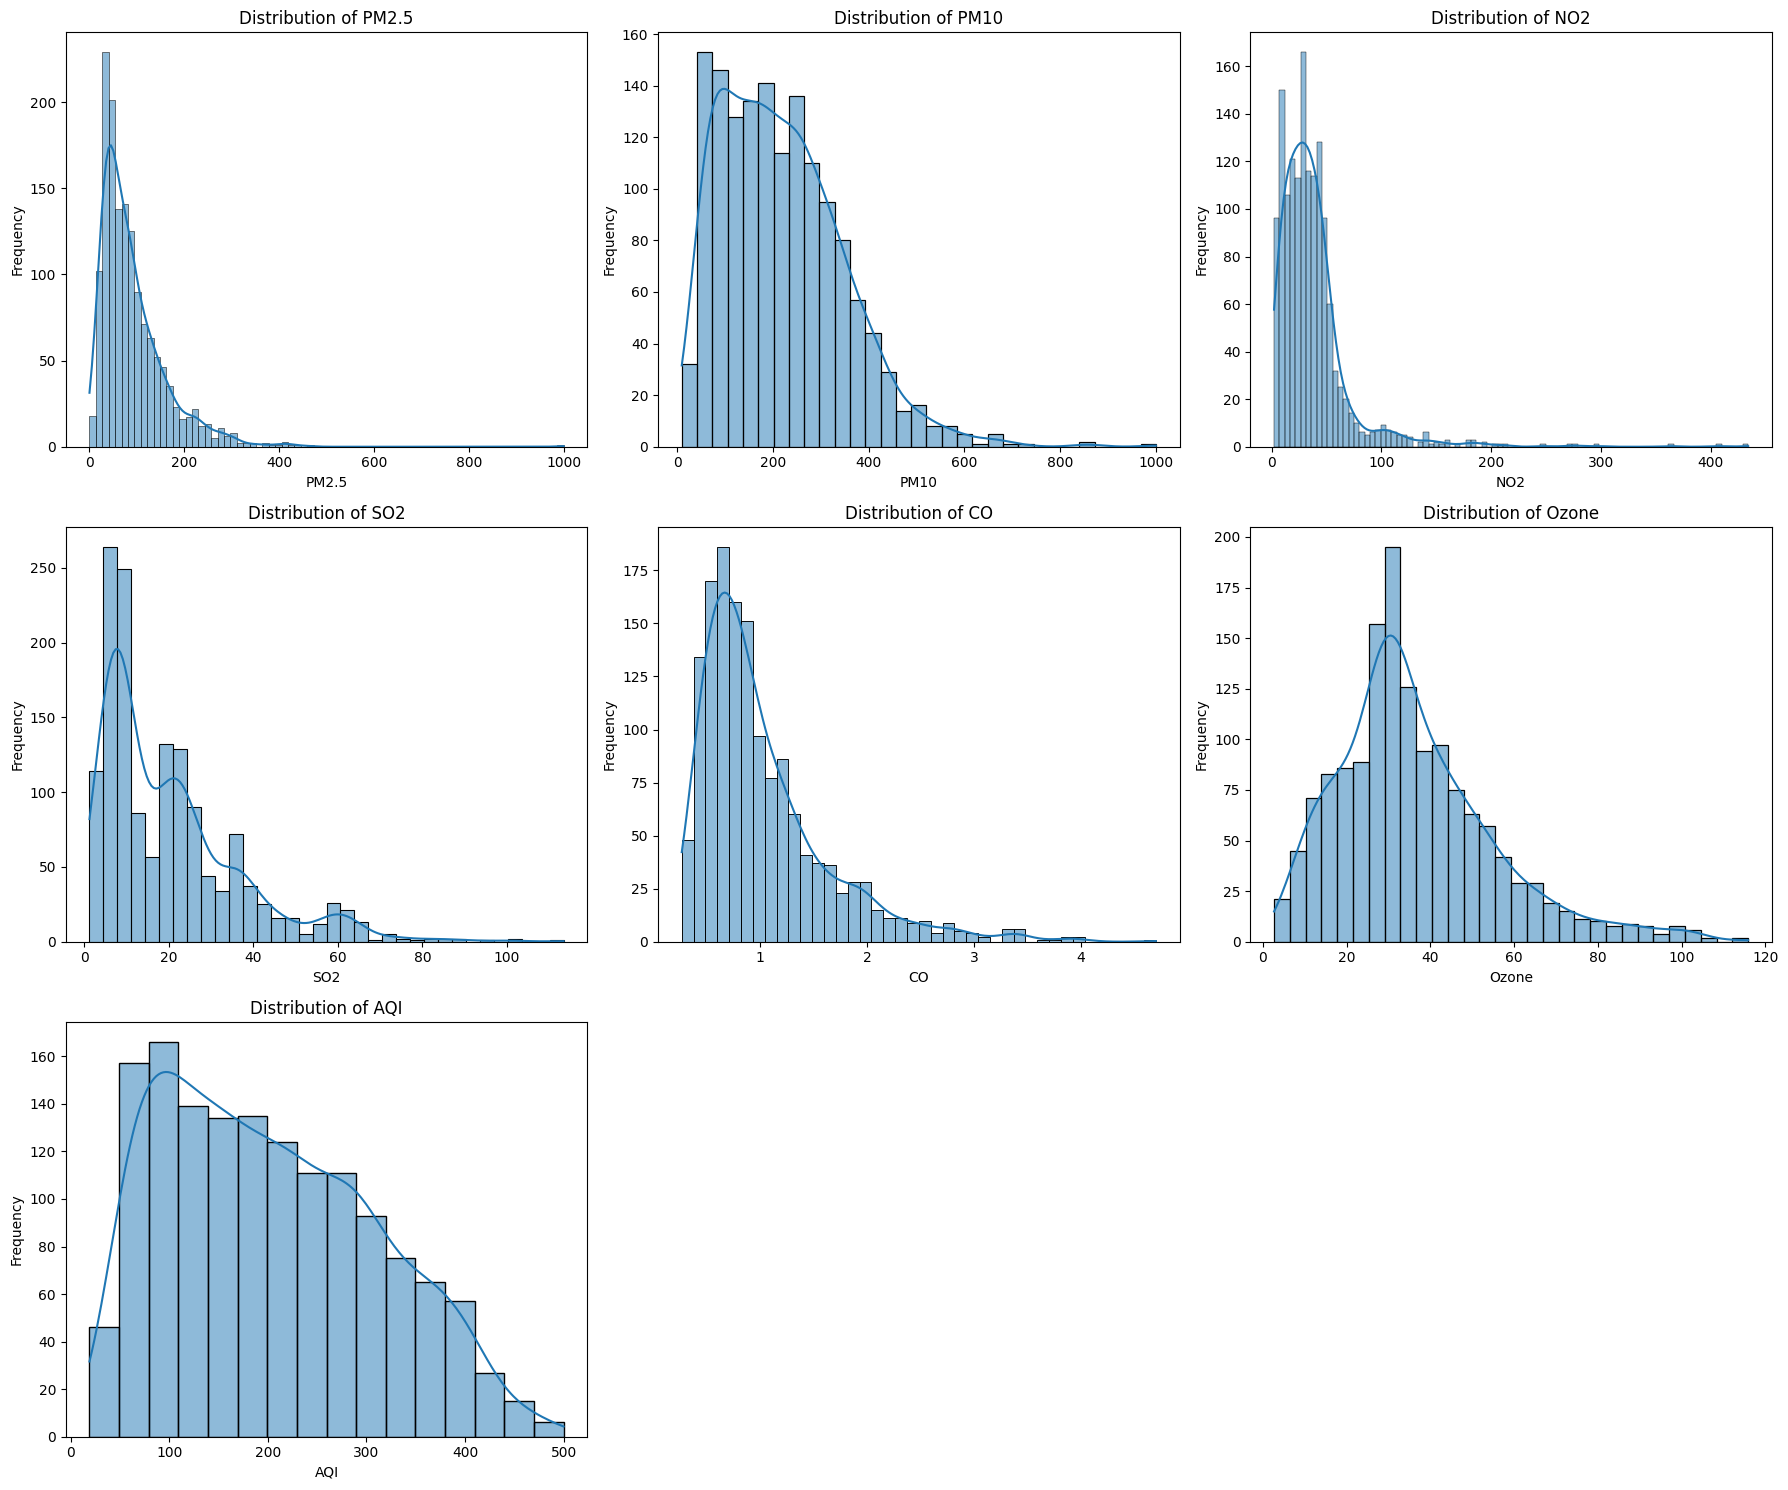

✅ Histograms generated.


In [24]:
# Histograms
fig_hist, axes_hist = plt.subplots(n_rows_hist, n_cols, figsize=(18, n_rows_hist * 5))
axes_hist = axes_hist.flatten()

print("Generating histograms...")
for i, var in enumerate(pollution_vars):
    sns.histplot(data=df_raw, x=var, kde=True, ax=axes_hist[i])
    axes_hist[i].set_title(f'Distribution of {var}')
    axes_hist[i].set_xlabel(var)
    axes_hist[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(n_vars, len(axes_hist)):
    fig_hist.delaxes(axes_hist[j])

plt.tight_layout()
plt.show()
print("✅ Histograms generated.")


Generating box plots...


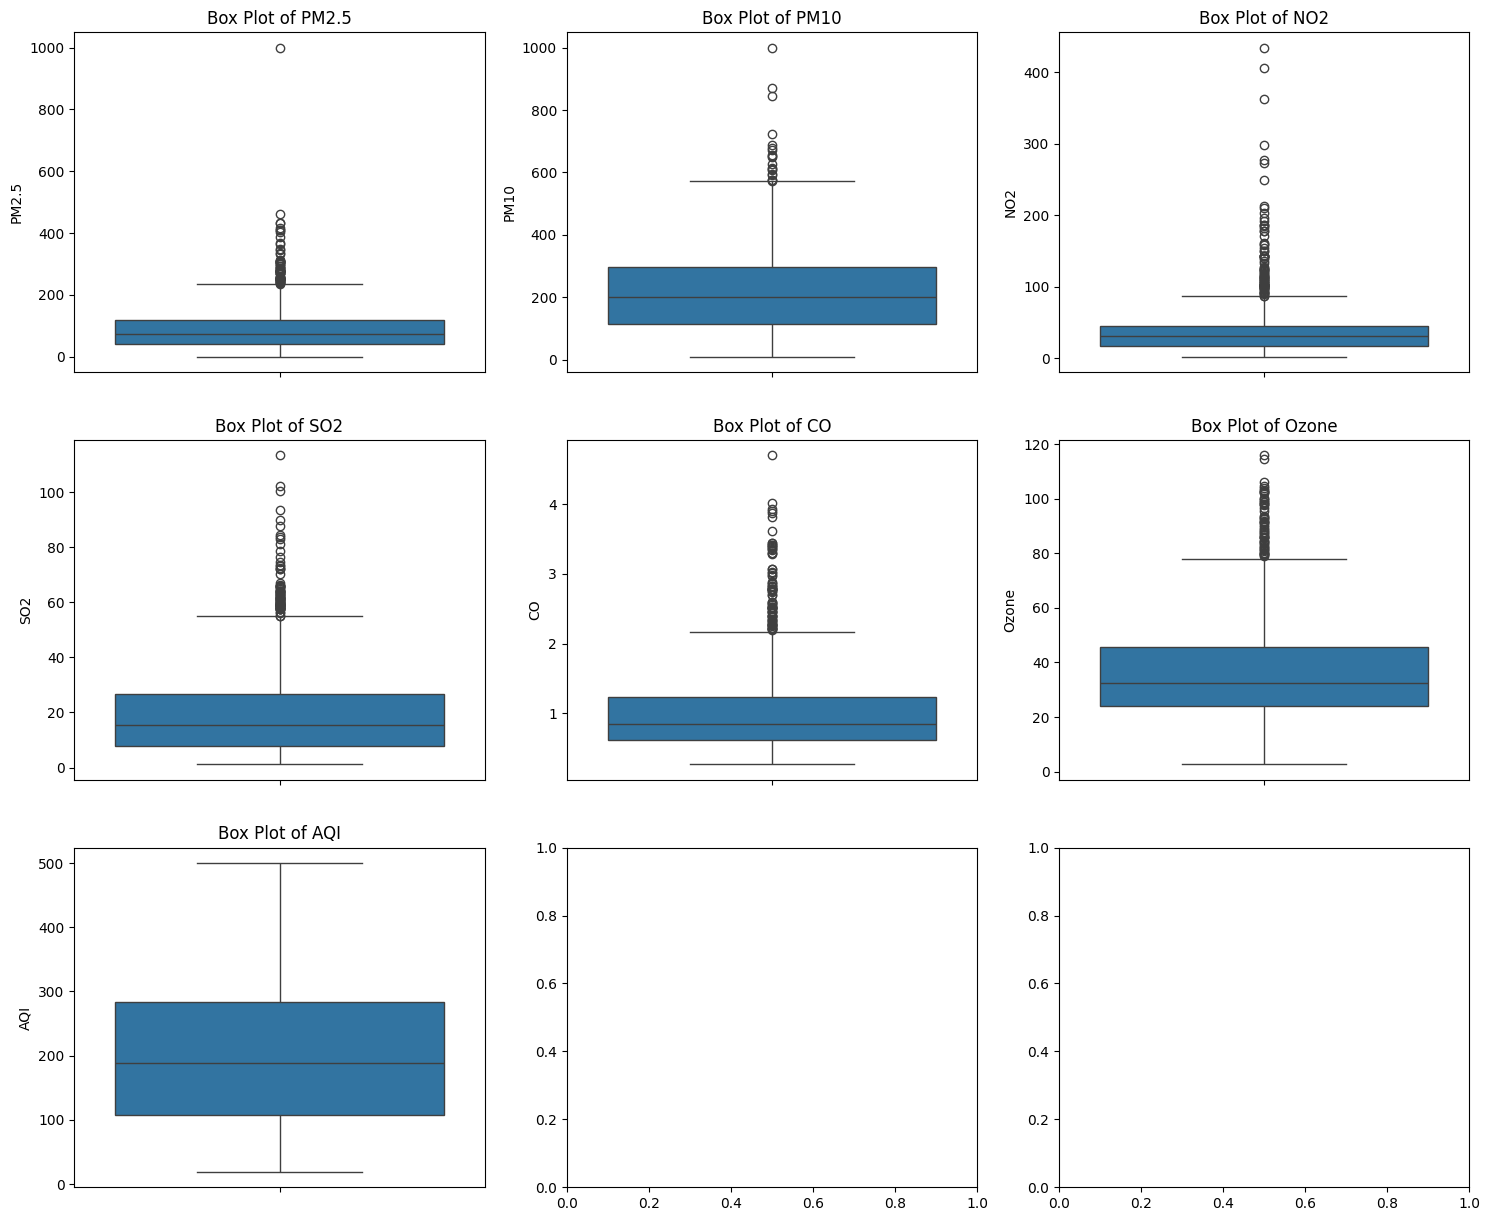

In [25]:
# Box plots
fig_box, axes_box = plt.subplots(n_rows_box, n_cols, figsize=(18, n_rows_box * 5))
axes_box = axes_box.flatten()

print("\nGenerating box plots...")
for i, var in enumerate(pollution_vars):
    sns.boxplot(data=df_raw, y=var, ax=axes_box[i])
    axes_box[i].set_title(f'Box Plot of {var}')
    axes_box[i].set_ylabel(var)

In [26]:
# Remove any unused subplots
for j in range(n_vars, len(axes_box)):
    fig_box.delaxes(axes_box[j])

plt.tight_layout()
plt.show()
print("✅ Box plots generated.")

print("\n🔍 Insights from visualizations:")
print("   • Histograms show the frequency distribution and skewness of each pollutant and AQI.")
print("   • Box plots clearly show the median, quartiles, and potential outliers for each variable.")
print("   • Pay attention to the tails of the distributions and the location of outliers shown in box plots.")

<Figure size 640x480 with 0 Axes>

✅ Box plots generated.

🔍 Insights from visualizations:
   • Histograms show the frequency distribution and skewness of each pollutant and AQI.
   • Box plots clearly show the median, quartiles, and potential outliers for each variable.
   • Pay attention to the tails of the distributions and the location of outliers shown in box plots.


# Supervised Learning (Step 2 : Data Preprocessing)

## Cell 1: Create directory structure and basic preprocessing setup

In [27]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("=== STEP 5: DATA CLEANING ===")
print("Cell 1: Setting up directory structure and preprocessing module...")
print("-" * 60)

# Create required directories
directories = [
    '/content/src',
    '/content/data/processed',
    '/content/models',
    '/content/results'
]

for directory in directories:
    os.makedirs(directory, exist_ok=True)
    print(f"✅ Created/verified: {directory}")

# Create __init__.py file for src module
with open('/content/src/__init__.py', 'w') as f:
    f.write('# Smart City Hybrid ML Project\n# Source code package\n')
print(f"✅ Created: /content/src/__init__.py")

# Add src to Python path for imports
import sys
if '/content' not in sys.path:
    sys.path.append('/content')

print(f"\n📁 Directory structure ready!")
print(f"📝 Next: Creating preprocessing.py with core functions...")
print(f"   • load_raw() - Load and validate raw data")
print(f"   • clean() - Handle missing values and data types")
print(f"   • save_processed() - Save cleaned data")

=== STEP 5: DATA CLEANING ===
Cell 1: Setting up directory structure and preprocessing module...
------------------------------------------------------------
✅ Created/verified: /content/src
✅ Created/verified: /content/data/processed
✅ Created/verified: /content/models
✅ Created/verified: /content/results
✅ Created: /content/src/__init__.py

📁 Directory structure ready!
📝 Next: Creating preprocessing.py with core functions...
   • load_raw() - Load and validate raw data
   • clean() - Handle missing values and data types
   • save_processed() - Save cleaned data


## Cell 2: Create load_raw() function in preprocessing.py

In [28]:
preprocessing_code = '''"""
Smart City Hybrid ML - Data Preprocessing Module
Functions: load_raw(), clean(), save_processed()
"""

import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

def load_raw(data_path='/content/data/raw/delhi_aqi.csv', validate=True):
    """
    Load raw Delhi AQI dataset and perform basic validation.

    Parameters:
    -----------
    data_path : str
        Path to the raw CSV file
    validate : bool
        Whether to perform data validation checks

    Returns:
    --------
    pandas.DataFrame
        Raw dataset loaded from CSV
    """
    print("🔄 Loading raw data...")

    try:
        # Load the dataset
        df = pd.read_csv(data_path)
        print(f"✅ Successfully loaded {data_path}")
        print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

        if validate:
            print("🔍 Running validation checks...")

            # Check expected columns
            expected_cols = ['Date', 'Month', 'Year', 'Holidays_Count', 'Days',
                           'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
            missing_cols = set(expected_cols) - set(df.columns)
            if missing_cols:
                raise ValueError(f"Missing expected columns: {missing_cols}")

            # Check for completely empty dataset
            if df.empty:
                raise ValueError("Dataset is empty")

            # Check data types
            numeric_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
            for col in numeric_cols:
                if not pd.api.types.is_numeric_dtype(df[col]):
                    print(f"⚠️  {col} is not numeric, will need type conversion")

            # Basic range validation
            if (df['AQI'] < 0).any() or (df['AQI'] > 500).any():
                print("⚠️  AQI values outside expected range [0, 500]")

            if (df['Month'] < 1).any() or (df['Month'] > 12).any():
                print("⚠️  Month values outside expected range [1, 12]")

            print("✅ Validation completed")

        return df

    except FileNotFoundError:
        raise FileNotFoundError(f"Data file not found: {data_path}")
    except Exception as e:
        raise Exception(f"Error loading data: {str(e)}")

def clean(df, handle_outliers='keep', missing_strategy='none'):
    """
    Clean the dataset by handling missing values, outliers, and data types.

    Parameters:
    -----------
    df : pandas.DataFrame
        Raw dataset to clean
    handle_outliers : str
        Strategy for outliers: 'keep', 'cap', 'remove'
    missing_strategy : str
        Strategy for missing values: 'none', 'drop', 'impute'

    Returns:
    --------
    pandas.DataFrame
        Cleaned dataset
    """
    print("🧹 Cleaning data...")
    df_clean = df.copy()

    # Record initial shape
    initial_shape = df_clean.shape
    print(f"📊 Initial shape: {initial_shape[0]:,} rows × {initial_shape[1]} columns")

    # TO BE IMPLEMENTED IN NEXT CELL
    # This is a placeholder - we'll add the full implementation

    return df_clean

def save_processed(df, output_path='/content/data/processed/traffic_pollution_clean.csv'):
    """
    Save processed dataset to CSV file.

    Parameters:
    -----------
    df : pandas.DataFrame
        Cleaned dataset to save
    output_path : str
        Path where to save the processed data
    """
    print(f"💾 Saving processed data to {output_path}...")

    # Create directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save to CSV
    df.to_csv(output_path, index=False)

    print(f"✅ Saved {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"📁 File size: {os.path.getsize(output_path) / 1024:.1f} KB")
'''

# Write the preprocessing.py file
with open('/content/src/preprocessing.py', 'w') as f:
    f.write(preprocessing_code)

print("✅ Created /content/src/preprocessing.py with load_raw() function")
print("📝 Functions included:")
print("   • load_raw() - ✅ Complete")
print("   • clean() - 🔄 Placeholder (next cell)")
print("   • save_processed() - ✅ Complete")

# Test the load_raw function
print(f"\n🧪 Testing load_raw() function...")

# Import and test
try:
    from src.preprocessing import load_raw
    df_test = load_raw()
    print(f"🎉 load_raw() works! Loaded {df_test.shape[0]} rows")
except Exception as e:
    print(f"❌ Error testing load_raw(): {e}")
    print("This is expected if data file path needs adjustment")

✅ Created /content/src/preprocessing.py with load_raw() function
📝 Functions included:
   • load_raw() - ✅ Complete
   • clean() - 🔄 Placeholder (next cell)
   • save_processed() - ✅ Complete

🧪 Testing load_raw() function...
🔄 Loading raw data...
❌ Error testing load_raw(): Data file not found: /content/data/raw/delhi_aqi.csv
This is expected if data file path needs adjustment


## Cell 3: Download data from GitHub and test all preprocessing functions

In [29]:
import pandas as pd
import requests
import os

print("📥 Downloading data from GitHub...")
print("-" * 50)

# Download the data file
github_url = "https://raw.githubusercontent.com/Sujoy-004/smart-city-hybrid-ml/refs/heads/main/data/raw/delhi_aqi.csv"
local_path = "/content/data/raw/delhi_aqi.csv"

try:
    # Create directory if needed
    os.makedirs(os.path.dirname(local_path), exist_ok=True)

    # Download file
    response = requests.get(github_url)
    response.raise_for_status()  # Raise an error for bad status codes

    # Save to local path
    with open(local_path, 'wb') as f:
        f.write(response.content)

    print(f"✅ Successfully downloaded to: {local_path}")
    print(f"📁 File size: {os.path.getsize(local_path) / 1024:.1f} KB")

except Exception as e:
    print(f"❌ Error downloading file: {e}")
    print("Trying direct pandas read...")
    # Fallback: read directly from URL
    local_path = github_url

print(f"\n🧪 Testing all preprocessing functions...")
print("=" * 60)

# Import our preprocessing functions
from src.preprocessing import load_raw, clean, save_processed

# Test 1: Load raw data
print("1️⃣ Testing load_raw():")
try:
    df_raw = load_raw(data_path=local_path)
    print(f"   ✅ Success! Shape: {df_raw.shape}")
except Exception as e:
    print(f"   ❌ Error: {e}")
    df_raw = None

if df_raw is not None:
    # Test 2: Clean data (with different strategies)
    print(f"\n2️⃣ Testing clean() with 'keep' outliers:")
    df_clean_keep = clean(df_raw, handle_outliers='keep')

    print(f"\n3️⃣ Testing clean() with 'cap' outliers:")
    df_clean_cap = clean(df_raw, handle_outliers='cap')

    # Test 3: Save processed data
    print(f"\n4️⃣ Testing save_processed():")
    try:
        save_processed(df_clean_cap, '/content/data/processed/traffic_pollution_clean.csv')
        print("   ✅ Successfully saved cleaned data!")
    except Exception as e:
        print(f"   ❌ Error saving: {e}")

    # Summary comparison
    print(f"\n📊 CLEANING RESULTS SUMMARY:")
    print("-" * 40)
    print(f"Original data:     {df_raw.shape[0]:,} rows")
    print(f"Keep outliers:     {df_clean_keep.shape[0]:,} rows")
    print(f"Cap outliers:      {df_clean_cap.shape[0]:,} rows")

    # Quick quality check
    print(f"\n🔍 QUALITY CHECK:")
    print(f"PM2.5 max values:")
    print(f"   Original: {df_raw['PM2.5'].max():.1f}")
    print(f"   Capped:   {df_clean_cap['PM2.5'].max():.1f}")

    print(f"PM10 max values:")
    print(f"   Original: {df_raw['PM10'].max():.1f}")
    print(f"   Capped:   {df_clean_cap['PM10'].max():.1f}")

else:
    print("❌ Could not proceed with testing due to data loading error")

print(f"\n✅ STEP 5 COMPLETE!")
print("🎯 Created: src/preprocessing.py with all functions")
print("🎯 Created: data/processed/traffic_pollution_clean.csv")
print("🎯 Ready for Step 6: Feature Engineering!")

📥 Downloading data from GitHub...
--------------------------------------------------
✅ Successfully downloaded to: /content/data/raw/delhi_aqi.csv
📁 File size: 76.5 KB

🧪 Testing all preprocessing functions...
1️⃣ Testing load_raw():
🔄 Loading raw data...
✅ Successfully loaded /content/data/raw/delhi_aqi.csv
📊 Shape: 1,461 rows × 12 columns
🔍 Running validation checks...
✅ Validation completed
   ✅ Success! Shape: (1461, 12)

2️⃣ Testing clean() with 'keep' outliers:
🧹 Cleaning data...
📊 Initial shape: 1,461 rows × 12 columns

3️⃣ Testing clean() with 'cap' outliers:
🧹 Cleaning data...
📊 Initial shape: 1,461 rows × 12 columns

4️⃣ Testing save_processed():
💾 Saving processed data to /content/data/processed/traffic_pollution_clean.csv...
✅ Saved 1,461 rows × 12 columns
📁 File size: 75.3 KB
   ✅ Successfully saved cleaned data!

📊 CLEANING RESULTS SUMMARY:
----------------------------------------
Original data:     1,461 rows
Keep outliers:     1,461 rows
Cap outliers:      1,461 rows

🔍

# Supervised Learning (Step 3 : Feature Engineering)

## CELL 1: Load libraries and current data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Load your cleaned data
df = pd.read_csv('data/processed/traffic_pollution_clean.csv')
print("Original shape:", df.shape)
print("Columns:", df.columns.tolist())

Original shape: (1461, 12)
Columns: ['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']


## CELL 2: Fix datetime - Convert Date, Month, Year to proper datetime

In [38]:
# CELL 2: Fix datetime - Convert Date, Month, Year to proper datetime

# Create proper datetime column (Date is day of month)
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Date']].rename(columns={'Date': 'day'}))
print("Date range:", df['datetime'].min(), "to", df['datetime'].max())
print("Data frequency check:")
print(df['datetime'].diff().value_counts().head())

# Sort by datetime to ensure proper time series order
df = df.sort_values('datetime').reset_index(drop=True)
print("After sorting shape:", df.shape)

Date range: 2021-01-01 00:00:00 to 2024-12-31 00:00:00
Data frequency check:
datetime
1 days    1460
Name: count, dtype: int64
After sorting shape: (1461, 13)


## CELL 3: Create temporal features

In [39]:
print("Creating temporal features...")

# Basic temporal features
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.weekday  # 0=Monday, 6=Sunday
df['day_of_year'] = df['datetime'].dt.dayofyear
df['week_of_year'] = df['datetime'].dt.isocalendar().week

# Cyclical encoding for temporal features (important for ML models)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

# Season encoding
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

df['season'] = df['month'].apply(get_season)

print("Temporal features created:")
temporal_cols = ['year', 'month', 'day', 'weekday', 'day_of_year', 'week_of_year',
                'month_sin', 'month_cos', 'day_sin', 'day_cos', 'weekday_sin', 'weekday_cos', 'season']
print(temporal_cols)

Creating temporal features...
Temporal features created:
['year', 'month', 'day', 'weekday', 'day_of_year', 'week_of_year', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'weekday_sin', 'weekday_cos', 'season']


## CELL 4: Create rolling window features (3-day, 7-day averages)


In [40]:
print("Creating rolling window features...")

# Define pollutant columns for rolling features
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']

# 3-day rolling averages
for col in pollutant_cols:
    df[f'{col}_rolling_3d'] = df[col].rolling(window=3, min_periods=1).mean()

# 7-day rolling averages
for col in pollutant_cols:
    df[f'{col}_rolling_7d'] = df[col].rolling(window=7, min_periods=1).mean()

# Rolling standard deviations (volatility measures)
for col in pollutant_cols:
    df[f'{col}_rolling_7d_std'] = df[col].rolling(window=7, min_periods=1).std()

print("Rolling features created for:", pollutant_cols)
print("New rolling columns:", [col for col in df.columns if 'rolling' in col])

Creating rolling window features...
Rolling features created for: ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
New rolling columns: ['PM2.5_rolling_3d', 'PM10_rolling_3d', 'NO2_rolling_3d', 'SO2_rolling_3d', 'CO_rolling_3d', 'Ozone_rolling_3d', 'AQI_rolling_3d', 'PM2.5_rolling_7d', 'PM10_rolling_7d', 'NO2_rolling_7d', 'SO2_rolling_7d', 'CO_rolling_7d', 'Ozone_rolling_7d', 'AQI_rolling_7d', 'PM2.5_rolling_7d_std', 'PM10_rolling_7d_std', 'NO2_rolling_7d_std', 'SO2_rolling_7d_std', 'CO_rolling_7d_std', 'Ozone_rolling_7d_std', 'AQI_rolling_7d_std']


## CELL 5: Create lag features (previous day, previous week)

In [41]:
print("Creating lag features...")

# 1-day lag features (yesterday's values)
for col in pollutant_cols:
    df[f'{col}_lag_1d'] = df[col].shift(1)

# 7-day lag features (same day last week)
for col in pollutant_cols:
    df[f'{col}_lag_7d'] = df[col].shift(7)

# Difference features (change from previous day)
for col in pollutant_cols:
    df[f'{col}_diff_1d'] = df[col] - df[col].shift(1)

print("Lag features created:")
lag_cols = [col for col in df.columns if 'lag' in col or 'diff' in col]
print(lag_cols[:5], "... and", len(lag_cols), "total lag/diff features")

Creating lag features...
Lag features created:
['PM2.5_lag_1d', 'PM10_lag_1d', 'NO2_lag_1d', 'SO2_lag_1d', 'CO_lag_1d'] ... and 21 total lag/diff features


## CELL 6: Create interaction and derived features

In [42]:
print("Creating interaction and derived features...")

# Pollutant ratios (often meaningful for air quality)
df['PM2.5_PM10_ratio'] = df['PM2.5'] / (df['PM10'] + 1e-6)  # avoid division by zero
df['NO2_SO2_ratio'] = df['NO2'] / (df['SO2'] + 1e-6)

# Combined pollutant indices
df['total_particulates'] = df['PM2.5'] + df['PM10']
df['total_gases'] = df['NO2'] + df['SO2'] + df['CO']

# Weekend indicator
df['is_weekend'] = (df['weekday'] >= 5).astype(int)

# Holiday interaction with pollutants
df['holiday_pm25_interaction'] = df['Holidays_Count'] * df['PM2.5']

# High pollution event indicators
df['high_aqi'] = (df['AQI'] > df['AQI'].quantile(0.75)).astype(int)
df['very_high_aqi'] = (df['AQI'] > df['AQI'].quantile(0.9)).astype(int)

# Weather-like interactions (using existing pollutants as proxies)
df['ozone_temp_proxy'] = df['Ozone'] * df['month']  # Ozone often correlates with temperature

print("Interaction features created:")
interaction_cols = ['PM2.5_PM10_ratio', 'NO2_SO2_ratio', 'total_particulates',
                   'total_gases', 'is_weekend', 'holiday_pm25_interaction',
                   'high_aqi', 'very_high_aqi', 'ozone_temp_proxy']
print(interaction_cols)

Creating interaction and derived features...
Interaction features created:
['PM2.5_PM10_ratio', 'NO2_SO2_ratio', 'total_particulates', 'total_gases', 'is_weekend', 'holiday_pm25_interaction', 'high_aqi', 'very_high_aqi', 'ozone_temp_proxy']


## CELL 7: Handle missing values from lag features and validate

In [43]:
print("Handling missing values from lag features...")

# Check missing values
missing_before = df.isnull().sum().sum()
print(f"Missing values before handling: {missing_before}")

# Fill initial lag values with forward fill or mean
lag_columns = [col for col in df.columns if 'lag' in col or 'diff' in col]
df[lag_columns] = df[lag_columns].fillna(method='bfill').fillna(df[lag_columns].mean())

# Fill any remaining NaN values
df = df.fillna(df.median(numeric_only=True))

missing_after = df.isnull().sum().sum()
print(f"Missing values after handling: {missing_after}")

# Validate feature engineering
print("\nFeature engineering validation:")
print(f"Original columns: {len(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI'])}")
print(f"Final columns: {len(df.columns)}")
print(f"New features created: {len(df.columns) - 12}")

Handling missing values from lag features...
Missing values before handling: 70
Missing values after handling: 0

Feature engineering validation:
Original columns: 12
Final columns: 77
New features created: 65


## CELL 8: Create feature groups and summary


In [44]:
# Organize features into logical groups
original_features = ['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
temporal_features = [col for col in df.columns if any(x in col for x in ['year', 'month', 'day', 'weekday', 'season', '_sin', '_cos'])]
rolling_features = [col for col in df.columns if 'rolling' in col]
lag_features = [col for col in df.columns if 'lag' in col or 'diff' in col]
interaction_features = [col for col in df.columns if any(x in col for x in ['ratio', 'total', 'interaction', 'high_', 'is_', 'proxy'])]

print("Feature groups summary:")
print(f"Original features: {len(original_features)}")
print(f"Temporal features: {len(temporal_features)}")
print(f"Rolling features: {len(rolling_features)}")
print(f"Lag features: {len(lag_features)}")
print(f"Interaction features: {len(interaction_features)}")
print(f"Total features: {len(df.columns)}")

Feature groups summary:
Original features: 12
Temporal features: 15
Rolling features: 21
Lag features: 21
Interaction features: 9
Total features: 77


## CELL 9: Basic feature analysis and visualization


Analyzing new features...
Top 10 features correlated with AQI:
AQI                   1.000000
AQI_rolling_3d        0.936461
total_particulates    0.925789
PM10                  0.899421
PM10_rolling_3d       0.887209
AQI_rolling_7d        0.873259
AQI_lag_1d            0.869170
PM10_lag_1d           0.833554
PM10_rolling_7d       0.831649
PM2.5_rolling_3d      0.807607
Name: AQI, dtype: float64

Season feature correlations with AQI:
season_summer: 0.474
season_winter: 0.425
season_spring: 0.027
season_autumn: 0.025


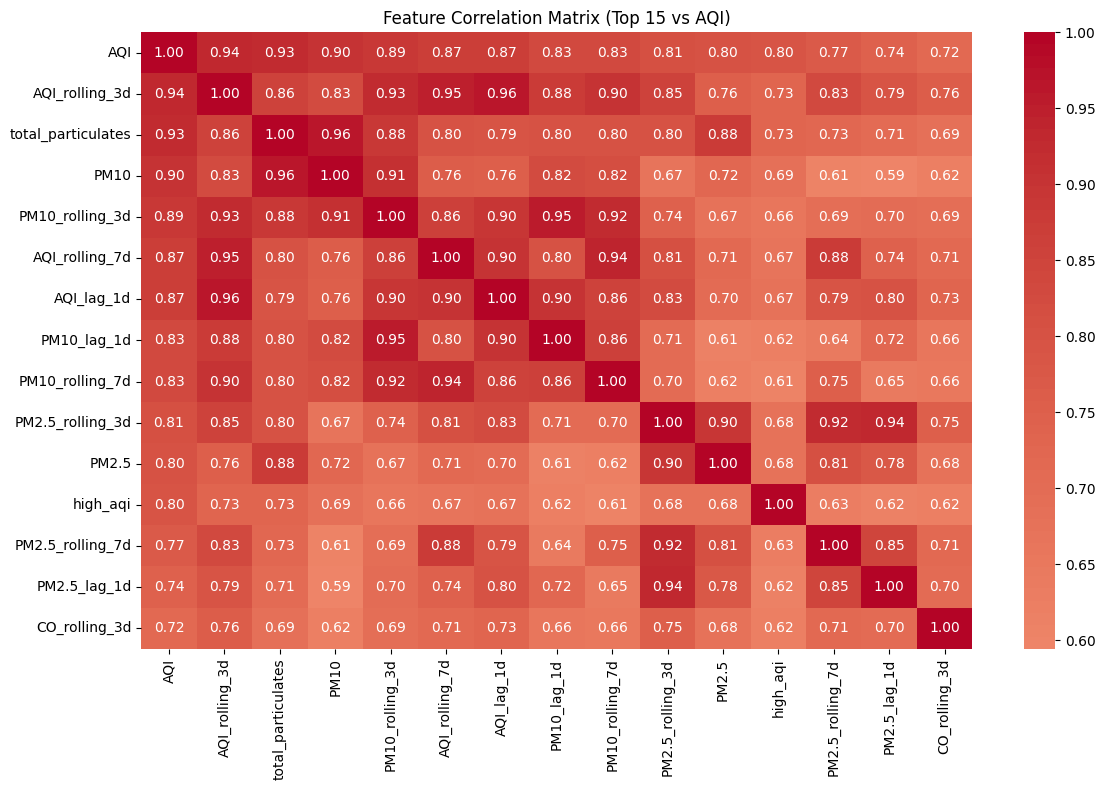

In [47]:
print("Analyzing new features...")

# Handle categorical variables for correlation analysis
df_analysis = df.copy()
df_analysis = pd.get_dummies(df_analysis, columns=['season'], prefix='season')

# Check correlation of new features with target (AQI)
feature_cols = [col for col in df_analysis.columns if col not in ['Date', 'datetime']]
correlations = df_analysis[feature_cols].corr()['AQI'].abs().sort_values(ascending=False)

print("Top 10 features correlated with AQI:")
print(correlations.head(10))

# Show season correlations specifically
season_cols = [col for col in correlations.index if 'season_' in col]
print(f"\nSeason feature correlations with AQI:")
for col in season_cols:
    print(f"{col}: {correlations[col]:.3f}")

# Plot correlation heatmap for key features
plt.figure(figsize=(12, 8))
key_features = correlations.head(15).index.tolist()
corr_matrix = df_analysis[key_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix (Top 15 vs AQI)')
plt.tight_layout()
plt.show()

## CELL 10: Save engineered features and create reusable function

In [49]:
print("Saving engineered features...")

# Save the current engineered dataset
df.to_csv('data/processed/delhi_aqi_engineered.csv', index=False)
print(f"Engineered dataset saved: {df.shape}")
print("Columns:", len(df.columns))

# Display sample of key features
print("\nSample of engineered features:")
sample_cols = ['datetime', 'AQI', 'PM2.5', 'PM2.5_rolling_7d', 'PM2.5_lag_1d',
               'weekday', 'is_weekend', 'season', 'total_particulates']
print(df[sample_cols].head(10).to_string())

print("\nFeature engineering function code for src/preprocessing.py:")
print("# Copy this function to your src/preprocessing.py file")

Saving engineered features...
Engineered dataset saved: (1461, 77)
Columns: 77

Sample of engineered features:
    datetime  AQI   PM2.5  PM2.5_rolling_7d  PM2.5_lag_1d  weekday  is_weekend  season  total_particulates
0 2021-01-01  462  408.80        408.800000        408.80        4           0  winter              851.22
1 2021-01-02  482  404.04        406.420000        408.80        5           1  winter              965.99
2 2021-01-03  263  225.07        345.970000        404.04        6           1  winter              464.11
3 2021-01-04  207   89.55        281.865000        225.07        0           0  winter              221.63
4 2021-01-05  149   54.06        236.304000         89.55        1           0  winter              109.60
5 2021-01-06  252  155.59        222.851667         54.06        2           0  winter              335.73
6 2021-01-07  288  118.39        207.928571        155.59        3           0  winter              249.57
7 2021-01-08  248  140.05        

## CELL 11: Feature importance analysis


Quick feature importance analysis...
Feature matrix shape: (1461, 77)
Top 15 most important features:
               feature  importance
66  total_particulates    0.690097
70            high_aqi    0.164245
28      AQI_rolling_3d    0.062805
71       very_high_aqi    0.036167
63         AQI_diff_1d    0.007830
5                 PM10    0.006103
23     PM10_rolling_3d    0.002946
44         PM10_lag_1d    0.002881
4                PM2.5    0.002513
49          AQI_lag_1d    0.002000
35      AQI_rolling_7d    0.001438
64    PM2.5_PM10_ratio    0.000961
62       Ozone_diff_1d    0.000835
43        PM2.5_lag_1d    0.000824
22    PM2.5_rolling_3d    0.000775


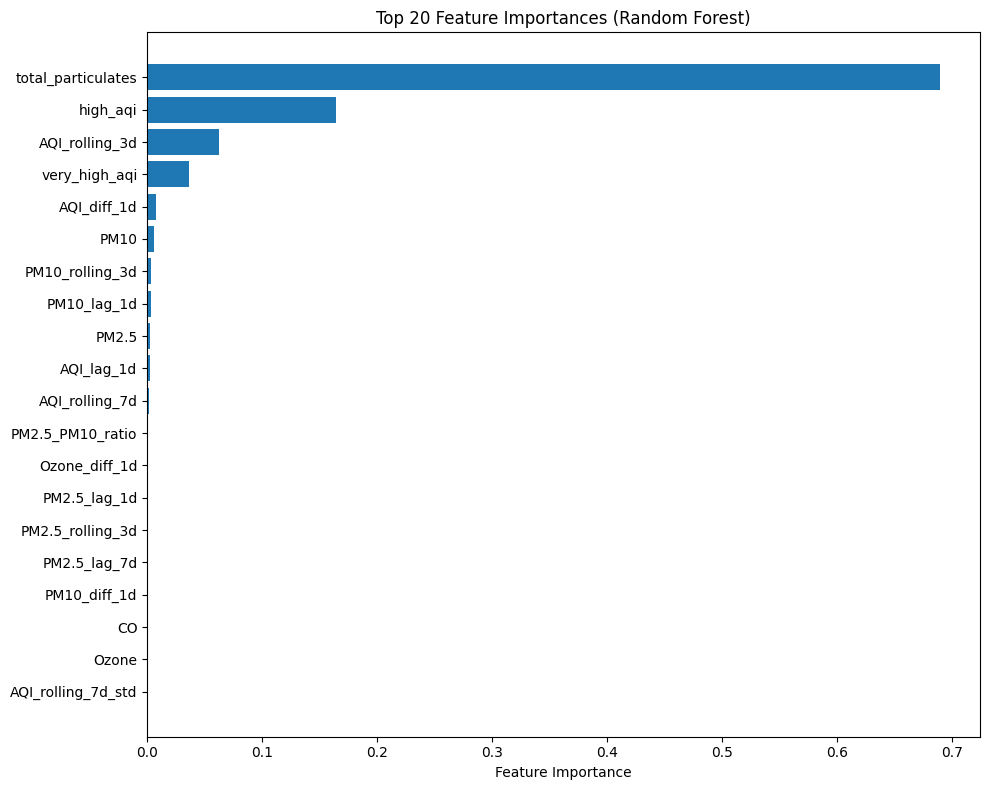

In [50]:
print("Quick feature importance analysis...")

# Prepare feature matrix for analysis
feature_cols = [col for col in df.columns if col not in ['Date', 'datetime', 'AQI']]
X = df[feature_cols]
y = df['AQI']

# Handle categorical variables
X_encoded = pd.get_dummies(X, columns=['season'], prefix='season')

print(f"Feature matrix shape: {X_encoded.shape}")

# Handle any remaining NaN
X_encoded = X_encoded.fillna(X_encoded.median())

# Quick Random Forest for feature importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train quick RF for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 most important features:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## CELL 12: Final dataset summary and save


In [57]:
print("Final dataset summary:")
print(f"Shape: {df.shape}")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Missing values: {df.isnull().sum().sum()}")

# Create feature summary
feature_summary = {
    'original_features': 12,
    'temporal_features': len([col for col in df.columns if any(x in col for x in ['year', 'month', 'day', 'weekday', 'season', '_sin', '_cos'])]),
    'rolling_features': len([col for col in df.columns if 'rolling' in col]),
    'lag_features': len([col for col in df.columns if 'lag' in col or 'diff' in col]),
    'interaction_features': len([col for col in df.columns if any(x in col for x in ['ratio', 'total', 'interaction', 'high_', 'is_', 'proxy'])]),
    'total_features': len(df.columns)
}

print("\nFeature engineering summary:")
for key, value in feature_summary.items():
    print(f"{key}: {value}")

# Update the processed dataset with engineered features (following your plan)
df.to_csv('data/processed/traffic_pollution_clean.csv', index=False)
print("\nEngineered features saved to: data/processed/traffic_pollution_clean.csv")

print("\n✅ Step 6: Feature Engineering COMPLETE!")

Final dataset summary:
Shape: (1461, 77)
Date range: 2021-01-01 00:00:00 to 2024-12-31 00:00:00
Missing values: 0

Feature engineering summary:
original_features: 12
temporal_features: 15
rolling_features: 21
lag_features: 21
interaction_features: 9
total_features: 77

Engineered features saved to: data/processed/traffic_pollution_clean.csv

✅ Step 6: Feature Engineering COMPLETE!


In [58]:
# Save the updated preprocessing.py file

content = '''
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

def load_raw(data_path='/content/data/raw/delhi_aqi.csv', validate=True):
    """
    Load raw Delhi AQI dataset and perform basic validation.

    Parameters:
    -----------
    data_path : str
        Path to the raw CSV file
    validate : bool
        Whether to perform data validation checks

    Returns:
    --------
    pandas.DataFrame
        Raw dataset loaded from CSV
    """
    print("🔄 Loading raw data...")

    try:
        # Load the dataset
        df = pd.read_csv(data_path)
        print(f"✅ Successfully loaded {data_path}")
        print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

        if validate:
            print("🔍 Running validation checks...")

            # Check expected columns
            expected_cols = ['Date', 'Month', 'Year', 'Holidays_Count', 'Days',
                           'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
            missing_cols = set(expected_cols) - set(df.columns)
            if missing_cols:
                raise ValueError(f"Missing expected columns: {missing_cols}")

            # Check for completely empty dataset
            if df.empty:
                raise ValueError("Dataset is empty")

            # Check data types
            numeric_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
            for col in numeric_cols:
                if not pd.api.types.is_numeric_dtype(df[col]):
                    print(f"⚠️  {col} is not numeric, will need type conversion")

            # Basic range validation
            if (df['AQI'] < 0).any() or (df['AQI'] > 500).any():
                print("⚠️  AQI values outside expected range [0, 500]")

            if (df['Month'] < 1).any() or (df['Month'] > 12).any():
                print("⚠️  Month values outside expected range [1, 12]")

            print("✅ Validation completed")

        return df

    except FileNotFoundError:
        raise FileNotFoundError(f"Data file not found: {data_path}")
    except Exception as e:
        raise Exception(f"Error loading data: {str(e)}")

def clean(df, handle_outliers='keep', missing_strategy='none'):
    """
    Clean the dataset by handling missing values, outliers, and data types.

    Parameters:
    -----------
    df : pandas.DataFrame
        Raw dataset to clean
    handle_outliers : str
        Strategy for outliers: 'keep', 'cap', 'remove'
    missing_strategy : str
        Strategy for missing values: 'none', 'drop', 'impute'

    Returns:
    --------
    pandas.DataFrame
        Cleaned dataset
    """
    print("🧹 Cleaning data...")
    df_clean = df.copy()

    # Record initial shape
    initial_shape = df_clean.shape
    print(f"📊 Initial shape: {initial_shape[0]:,} rows × {initial_shape[1]} columns")

    # 1. Handle missing values (from audit: we found none, but good to have)
    missing_before = df_clean.isnull().sum().sum()
    if missing_before > 0:
        print(f"🔧 Found {missing_before} missing values")

        if missing_strategy == 'drop':
            df_clean = df_clean.dropna()
            print(f"   → Dropped rows with missing values")

        elif missing_strategy == 'impute':
            # Impute numerical columns with median
            numeric_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
            for col in numeric_cols:
                if df_clean[col].isnull().sum() > 0:
                    median_val = df_clean[col].median()
                    df_clean[col].fillna(median_val, inplace=True)
                    print(f"   → Imputed {col} with median: {median_val:.2f}")
    else:
        print("✅ No missing values found")

    # 2. Fix data types
    print("🔧 Ensuring correct data types...")

    # Ensure integer columns are integers
    int_cols = ['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'AQI']
    for col in int_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].astype(int)

    # Ensure float columns are floats
    float_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
    for col in float_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].astype(float)

    # 3. Handle data quality issues found in audit
    print("🔧 Fixing data quality issues...")

    # Cap data at reasonable maximums (from audit: found 1000 values)
    if handle_outliers == 'cap':
        # Cap PM2.5 and PM10 at 999 (instead of exactly 1000 which looks like data error)
        pm25_capped = (df_clean['PM2.5'] >= 1000).sum()
        pm10_capped = (df_clean['PM10'] >= 1000).sum()

        df_clean['PM2.5'] = df_clean['PM2.5'].clip(upper=999)
        df_clean['PM10'] = df_clean['PM10'].clip(upper=999)

        if pm25_capped > 0:
            print(f"   → Capped {pm25_capped} PM2.5 values at 999")
        if pm10_capped > 0:
            print(f"   → Capped {pm10_capped} PM10 values at 999")

    elif handle_outliers == 'remove':
        # Remove extreme outliers using IQR method
        initial_rows = len(df_clean)

        pollution_vars = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
        for var in pollution_vars:
            Q1 = df_clean[var].quantile(0.25)
            Q3 = df_clean[var].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 3 * IQR  # Using 3*IQR for extreme outliers
            upper_bound = Q3 + 3 * IQR

            outliers_mask = (df_clean[var] < lower_bound) | (df_clean[var] > upper_bound)
            outliers_removed = outliers_mask.sum()

            if outliers_removed > 0:
                df_clean = df_clean[~outliers_mask]
                print(f"   → Removed {outliers_removed} extreme outliers from {var}")

        final_rows = len(df_clean)
        if final_rows < initial_rows:
            print(f"   → Total rows removed: {initial_rows - final_rows}")

    # 4. Add data validation
    print("✅ Final validation...")

    # Ensure AQI is within valid range
    invalid_aqi = ((df_clean['AQI'] < 0) | (df_clean['AQI'] > 500)).sum()
    if invalid_aqi > 0:
        print(f"⚠️  Found {invalid_aqi} invalid AQI values")
        df_clean = df_clean[(df_clean['AQI'] >= 0) & (df_clean['AQI'] <= 500)]

    # Ensure months are valid
    invalid_months = ((df_clean['Month'] < 1) | (df_clean['Month'] > 12)).sum()
    if invalid_months > 0:
        print(f"⚠️  Found {invalid_months} invalid month values")
        df_clean = df_clean[(df_clean['Month'] >= 1) & (df_clean['Month'] <= 12)]

    # Final shape
    final_shape = df_clean.shape
    print(f"📊 Final shape: {final_shape[0]:,} rows × {final_shape[1]} columns")

    if final_shape[0] < initial_shape[0]:
        rows_removed = initial_shape[0] - final_shape[0]
        print(f"🗑️  Removed {rows_removed:,} rows ({rows_removed/initial_shape[0]*100:.1f}%)")

    return df_clean

def feature_engineer(df):
    """
    Apply comprehensive feature engineering to cleaned dataframe.

    Parameters:
    -----------
    df : pandas.DataFrame
        Cleaned dataframe with Date, Month, Year columns

    Returns:
    --------
    pandas.DataFrame
        Dataframe with engineered features (77 total features)
    """
    print("🔧 Starting feature engineering...")
    df_eng = df.copy()

    # Create proper datetime if needed
    if 'datetime' not in df_eng.columns:
        print("   → Creating datetime column...")
        df_eng['datetime'] = pd.to_datetime(df_eng[['Year', 'Month', 'Date']].rename(columns={'Date': 'day'}))

    # Sort by datetime to ensure proper time series order
    df_eng = df_eng.sort_values('datetime').reset_index(drop=True)

    # ===================================================================
    # TEMPORAL FEATURES
    # ===================================================================
    print("   → Creating temporal features...")

    # Basic temporal features
    df_eng['year'] = df_eng['datetime'].dt.year
    df_eng['month'] = df_eng['datetime'].dt.month
    df_eng['day'] = df_eng['datetime'].dt.day
    df_eng['weekday'] = df_eng['datetime'].dt.weekday  # 0=Monday, 6=Sunday
    df_eng['day_of_year'] = df_eng['datetime'].dt.dayofyear
    df_eng['week_of_year'] = df_eng['datetime'].dt.isocalendar().week

    # Cyclical encoding for temporal features (important for ML models)
    df_eng['month_sin'] = np.sin(2 * np.pi * df_eng['month'] / 12)
    df_eng['month_cos'] = np.cos(2 * np.pi * df_eng['month'] / 12)
    df_eng['day_sin'] = np.sin(2 * np.pi * df_eng['day_of_year'] / 365)
    df_eng['day_cos'] = np.cos(2 * np.pi * df_eng['day_of_year'] / 365)
    df_eng['weekday_sin'] = np.sin(2 * np.pi * df_eng['weekday'] / 7)
    df_eng['weekday_cos'] = np.cos(2 * np.pi * df_eng['weekday'] / 7)

    # Season encoding
    def get_season(month):
        if month in [12, 1, 2]:
            return 'winter'
        elif month in [3, 4, 5]:
            return 'spring'
        elif month in [6, 7, 8]:
            return 'summer'
        else:
            return 'autumn'

    df_eng['season'] = df_eng['month'].apply(get_season)

    # ===================================================================
    # ROLLING WINDOW FEATURES
    # ===================================================================
    print("   → Creating rolling window features...")

    # Define pollutant columns for rolling features
    pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']

    # 3-day rolling averages
    for col in pollutant_cols:
        df_eng[f'{col}_rolling_3d'] = df_eng[col].rolling(window=3, min_periods=1).mean()

    # 7-day rolling averages
    for col in pollutant_cols:
        df_eng[f'{col}_rolling_7d'] = df_eng[col].rolling(window=7, min_periods=1).mean()

    # Rolling standard deviations (volatility measures)
    for col in pollutant_cols:
        df_eng[f'{col}_rolling_7d_std'] = df_eng[col].rolling(window=7, min_periods=1).std()

    # ===================================================================
    # LAG FEATURES
    # ===================================================================
    print("   → Creating lag features...")

    # 1-day lag features (yesterday's values)
    for col in pollutant_cols:
        df_eng[f'{col}_lag_1d'] = df_eng[col].shift(1)

    # 7-day lag features (same day last week)
    for col in pollutant_cols:
        df_eng[f'{col}_lag_7d'] = df_eng[col].shift(7)

    # Difference features (change from previous day)
    for col in pollutant_cols:
        df_eng[f'{col}_diff_1d'] = df_eng[col] - df_eng[col].shift(1)

    # ===================================================================
    # INTERACTION AND DERIVED FEATURES
    # ===================================================================
    print("   → Creating interaction features...")

    # Pollutant ratios (often meaningful for air quality)
    df_eng['PM2.5_PM10_ratio'] = df_eng['PM2.5'] / (df_eng['PM10'] + 1e-6)  # avoid division by zero
    df_eng['NO2_SO2_ratio'] = df_eng['NO2'] / (df_eng['SO2'] + 1e-6)

    # Combined pollutant indices
    df_eng['total_particulates'] = df_eng['PM2.5'] + df_eng['PM10']
    df_eng['total_gases'] = df_eng['NO2'] + df_eng['SO2'] + df_eng['CO']

    # Weekend indicator
    df_eng['is_weekend'] = (df_eng['weekday'] >= 5).astype(int)

    # Holiday interaction with pollutants
    df_eng['holiday_pm25_interaction'] = df_eng['Holidays_Count'] * df_eng['PM2.5']

    # High pollution event indicators
    df_eng['high_aqi'] = (df_eng['AQI'] > df_eng['AQI'].quantile(0.75)).astype(int)
    df_eng['very_high_aqi'] = (df_eng['AQI'] > df_eng['AQI'].quantile(0.9)).astype(int)

    # Weather-like interactions (using existing pollutants as proxies)
    df_eng['ozone_temp_proxy'] = df_eng['Ozone'] * df_eng['month']  # Ozone often correlates with temperature

    # ===================================================================
    # HANDLE MISSING VALUES
    # ===================================================================
    print("   → Handling missing values from lag features...")

    # Fill initial lag values with backward fill then forward fill
    lag_columns = [col for col in df_eng.columns if 'lag' in col or 'diff' in col]
    df_eng[lag_columns] = df_eng[lag_columns].fillna(method='bfill').fillna(df_eng[lag_columns].mean())

    # Fill any remaining NaN values with median
    df_eng = df_eng.fillna(df_eng.median(numeric_only=True))

    # ===================================================================
    # FINAL SUMMARY
    # ===================================================================
    print(f"✅ Feature engineering complete!")
    print(f"📊 Final shape: {df_eng.shape[0]:,} rows × {df_eng.shape[1]} columns")
    print(f"🆕 New features created: {df_eng.shape[1] - df.shape[1]}")

    # Feature summary
    temporal_features = len([col for col in df_eng.columns if any(x in col for x in ['year', 'month', 'day', 'weekday', 'season', '_sin', '_cos'])])
    rolling_features = len([col for col in df_eng.columns if 'rolling' in col])
    lag_features = len([col for col in df_eng.columns if 'lag' in col or 'diff' in col])
    interaction_features = len([col for col in df_eng.columns if any(x in col for x in ['ratio', 'total', 'interaction', 'high_', 'is_', 'proxy'])])

    print(f"   → Temporal features: {temporal_features}")
    print(f"   → Rolling features: {rolling_features}")
    print(f"   → Lag features: {lag_features}")
    print(f"   → Interaction features: {interaction_features}")

    return df_eng

def save_processed(df, output_path='/content/data/processed/traffic_pollution_clean.csv'):
    """
    Save processed dataset to CSV file.

    Parameters:
    -----------
    df : pandas.DataFrame
        Cleaned/engineered dataset to save
    output_path : str
        Path where to save the processed data
    """
    print(f"💾 Saving processed data to {output_path}...")

    # Create directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save to CSV
    df.to_csv(output_path, index=False)

    print(f"✅ Saved {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"📁 File size: {os.path.getsize(output_path) / 1024:.1f} KB")

# ===================================================================
# WORKFLOW FUNCTIONS
# ===================================================================

def full_preprocessing_pipeline(data_path='/content/data/raw/delhi_aqi.csv',
                               output_path='/content/data/processed/traffic_pollution_clean.csv',
                               handle_outliers='keep',
                               missing_strategy='none',
                               apply_feature_engineering=True):
    """
    Run the complete preprocessing pipeline.

    Parameters:
    -----------
    data_path : str
        Path to raw data file
    output_path : str
        Path to save processed data
    handle_outliers : str
        Strategy for outliers: 'keep', 'cap', 'remove'
    missing_strategy : str
        Strategy for missing values: 'none', 'drop', 'impute'
    apply_feature_engineering : bool
        Whether to apply feature engineering

    Returns:
    --------
    pandas.DataFrame
        Fully processed dataset
    """
    print("🚀 Starting full preprocessing pipeline...")
    print("=" * 50)

    # Step 1: Load raw data
    df_raw = load_raw(data_path, validate=True)

    print("=" * 50)

    # Step 2: Clean data
    df_clean = clean(df_raw, handle_outliers=handle_outliers, missing_strategy=missing_strategy)

    print("=" * 50)

    # Step 3: Feature engineering (optional)
    if apply_feature_engineering:
        df_final = feature_engineer(df_clean)
    else:
        df_final = df_clean
        print("⏭️  Skipping feature engineering")

    print("=" * 50)

    # Step 4: Save processed data
    save_processed(df_final, output_path)

    print("=" * 50)
    print("🎉 Preprocessing pipeline completed successfully!")

    return df_final
'''

with open('src/preprocessing.py', 'w') as f:
    f.write(content)

print("✅ Updated src/preprocessing.py with feature_engineer() function!")

✅ Updated src/preprocessing.py with feature_engineer() function!
